In [43]:
import matplotlib.pyplot as pplot
import pandas as pd
# file_url = 'http://openpsychometrics.org/_rawdata/BIG5.zip'

### Example demonstrating clustering and NMF on personality test data
The data is taken from [http://openpsychometrics.org/_rawdata/BIG5.zip](http://openpsychometrics.org/_rawdata/BIG5.zip) and they correspond to Big5 personality test results. 

This notebook is a quick test to check if there are "Clusters" of different personalities, or if there is a continuum of personality traits (at least as measured by Big5).


### loading the data:

In [94]:
d = pd.read_csv('../Dataset/BIG5/data.csv', sep = '\t')
ocean = [c for c in d.columns if c[0] in 'OCEAN']
d_vals = d[ocean]

### Non-negative matrix factorization analysis

The non-negative factorization analysis is a popular technique to discover interpretable components in data that are positive. 

The technique attempts to discover two non-negative matrices $C$ and $W$, that when multiplied return the original data $X$. I.e., 

\begin{equation}
X_{ij} = C_{ik} W_{kj}
\end{equation}

In the example above, the number of components is $k$. All elements of the matrices above are non-negative. 

The interpretation of the results is performed by jointly considering the components "$C_{ik}$".
A "component", in the present context, is a set of answers, that occurs often together.

For example, bellow is a component identified (mapped back from the maximum component elements to the questions in the test):
```
Comp. 1:
----------
I am quiet around strangers.
I am not interested in other people's problems.
I am relaxed most of the time.
I am not really interested in others.
I don't talk a lot.
```

In [209]:
from sklearn.decomposition import NMF, PCA
nmf = NMF(n_components=10)
nmf.fit(d_vals)
# d_vals.hist()

NMF(n_components=10)

Text(0.5, 1.0, 'Components plot')

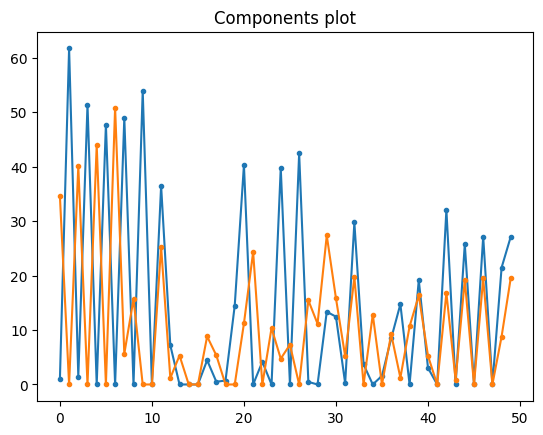

In [212]:
C = nmf.components_
pplot.plot(C[0,:],'.-')
pplot.plot(C[1,:],'.-')
pplot.title("Components plot")

In [213]:
# Loading the questions to print questions corresponding 
# to maximum elements of components:

found_first = False
line_dat = []
with open('../Dataset/BIG5/codebook.txt','r') as f:
    l = f.readline()
    while l:
        l = f.readline()
        if 'I am the life' in l:
            found_first = True
        
        if not found_first:
            continue
        if not(l[0] in 'OCEAN'):
            continue
        line_dat.append(l)
        if l[:3] == 'O10':
            break

qlist = list(map(lambda x : x.split('\t'), line_dat))
qlist_d = {k : v for k, v in qlist}
qlist_txt = [qlist_d[c] for c in d_vals.columns]        

### Component inspection and interpretation
 

In [214]:
for _c_idx in range(C.shape[0]):
    c_idx = np.argsort(C[_c_idx,:])[-5:]
    print(_c_idx, c_idx)
    _l = [qlist_txt[_c] for _c in c_idx]
    for kk in _l:
        print(kk)

    print("---")

0 [5 7 3 9 1]
I have little to say.

I don't like to draw attention to myself.

I keep in the background.

I am quiet around strangers.

I don't talk a lot.

---
1 [29  0  2  4  6]
I make people feel at ease.

I am the life of the party.

I feel comfortable around people.

I start conversations.

I talk to a lot of different people at parties.

---
2 [10 20 14 22 18]
I get stressed out easily.

I feel little concern for others.

I am easily disturbed.

I insult people.

I get irritated easily.

---
3 [45 36 41 34 38]
I do not have a good imagination.

I like order.

I have difficulty understanding abstract ideas.

I get chores done right away.

I follow a schedule.

---
4 [40 33 47 35 31]
I have a rich vocabulary.

I make a mess of things.

I use difficult words.

I often forget to put things back in their proper place.

I leave my belongings around.

---
5 [36 30 38 40 47]
I like order.

I am always prepared.

I follow a schedule.

I have a rich vocabulary.

I use difficult words.

--

## Clustering

Through clustering, we can test the hypothesis that personality types cluster. 

In [216]:

r = nmf.transform(d_vals.values)
from sklearn.cluster import SpectralClustering
s = SpectralClustering(n_clusters=6)

/home/charilaos/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NMF was fitted with feature names
  warnings.warn(


In [217]:
res = s.fit_predict(r)

In [218]:
from sklearn.manifold import TSNE
t = TSNE().fit_transform(r)

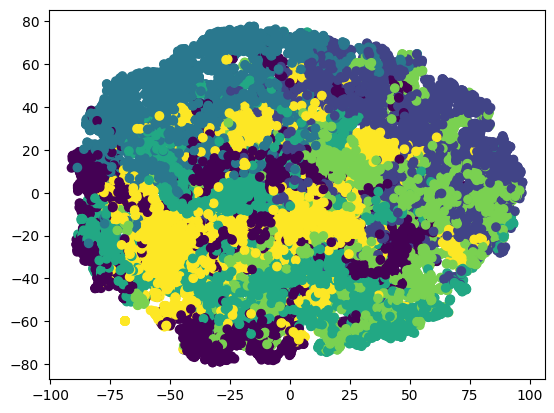

In [219]:
pplot.scatter(t[:,0],t[:,1], c= res)

### Conclusion

There seems to be little evidence that there is some sort of "clustering" behavior in personality types.

Although the data can indeed organized in clusters, a more probably hypothesis seems to be that the personality traits as measured according the Big5 personality test in this dataset, are a continuoum rather than a set of clusters.

Text(0.5, 1.0, 'Plotting the TSNE data with coloring from the components')

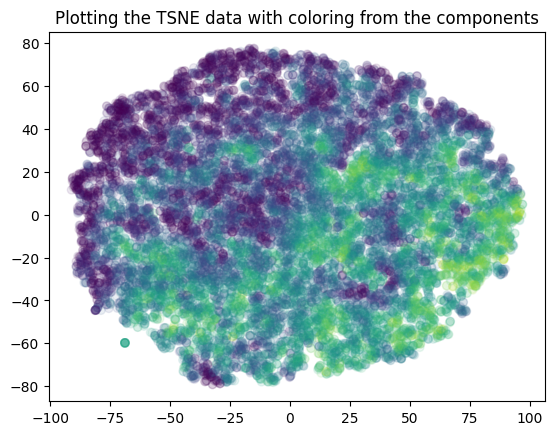

In [221]:


pplot.scatter(t[:,0], t[:,1], c = r[:,6], alpha = 0.1)
pplot.title("Plotting the TSNE data with coloring from the components")